In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pathlib

### Prática
1. Aquisição e pré-processamento dos dados
2. Treinamento
* Implementar arquitetura
* Definir otimizadores, métricas e regularizadores
3. Teste (avaliação de desempenho)

# Prática - Tumor

#### 1. Aquisição dos dados


In [2]:
path = '../../Datasets/Exercicio_Tumores'
data = pathlib.Path(path)

In [3]:
data

WindowsPath('../../Datasets/Exercicio_Tumores')

In [4]:
list(data.glob('**/*.jpg'))[:2]

[WindowsPath('../../Datasets/Exercicio_Tumores/glioma_tumor/G_1.jpg'),
 WindowsPath('../../Datasets/Exercicio_Tumores/glioma_tumor/G_10.jpg')]

In [5]:
list(data.glob('glioma_tumor/*.jpg'))[:5]

[WindowsPath('../../Datasets/Exercicio_Tumores/glioma_tumor/G_1.jpg'),
 WindowsPath('../../Datasets/Exercicio_Tumores/glioma_tumor/G_10.jpg'),
 WindowsPath('../../Datasets/Exercicio_Tumores/glioma_tumor/G_100.jpg'),
 WindowsPath('../../Datasets/Exercicio_Tumores/glioma_tumor/G_101.jpg'),
 WindowsPath('../../Datasets/Exercicio_Tumores/glioma_tumor/G_102.jpg')]

In [6]:
disease = {
    "glioma_tumor": list(data.glob('glioma_tumor/*.jpg')),
    "meningioma_tumor": list(data.glob('meningioma_tumor/*.jpg')),
    "normal": list(data.glob('normal/*.jpg')),
    "pituitary_tumor" : list(data.glob('pituitary_tumor/*.jpg')),       

}

In [7]:
disease.keys()

dict_keys(['glioma_tumor', 'meningioma_tumor', 'normal', 'pituitary_tumor'])

In [8]:
labels = {
    "glioma_tumor" : 0,
    "meningioma_tumor":1,
    "normal":2,
    "pituitary_tumor":3
}

In [9]:
import os
import cv2

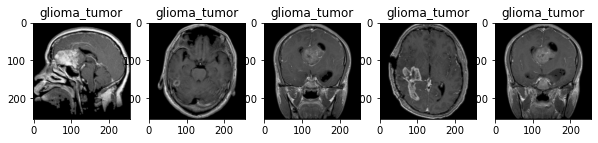

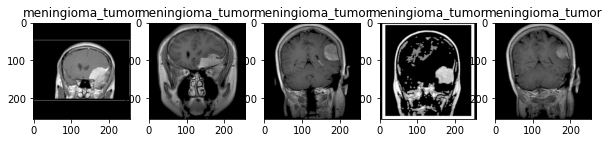

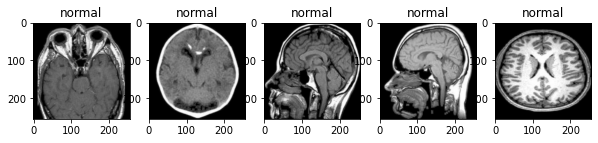

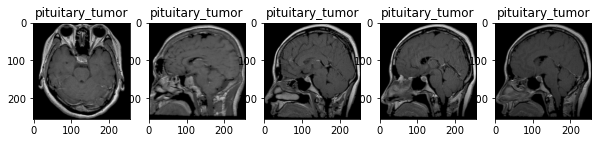

In [10]:
directory=os.listdir(path)
for each in disease.keys():
    plt.figure(figsize=(10, 10))
    currentFolder = path + '/' + each
    for i, file in enumerate(os.listdir(currentFolder)[0:5]):
        fullpath = path + '/' + each + "/" + file
        img=cv2.imread(fullpath)
        ax=plt.subplot(1,5,i+1)
        ax.set_title(each)
        plt.imshow(img)

## Carregamento dos dados

In [11]:
X = []
Y = []
for name, diseases in disease.items():
    for disease in diseases:
        img = cv2.imread(str(disease))
        img = img.astype('float32') / 255.0
        X.append(img)
        Y.append(labels[name])     

In [12]:
X

[array([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]], dtype=float32),
 array([[[0., 0., 0.],
         [0., 0.,

In [13]:
Y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [14]:
print(set(Y))

print(Y.count(0))
print(Y.count(1))
print(Y.count(2))
print(Y.count(3))

{0, 1, 2, 3}
901
913
438
844


In [15]:
X= np.array(X)
Y= np.array(Y)

In [16]:
X.shape

(3096, 256, 256, 3)

In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [18]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2476, 256, 256, 3)
(2476,)
(620, 256, 256, 3)
(620,)


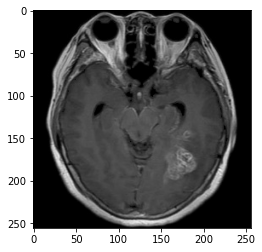

In [19]:
# Escolhendo uma imagem para plotar
sample = 10
image = X_train[sample]

# Plotando a imagem
fig = plt.figure
plt.imshow(image)
plt.show()

In [20]:
y_train

array([2, 3, 0, ..., 1, 3, 3])

#### 2. Pré-processamento

#### Normalização

#### One hot encoder na variável alvo

In [21]:
hot = OneHotEncoder()
y_train = hot.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test = hot.transform(y_test.reshape(-1, 1)).toarray()


y_train

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

#### 3. Particionamento de base de dados

In [22]:
from sklearn.model_selection import train_test_split

x_treino, x_val, y_treino, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 13)

x_treino.shape, x_val.shape, X_test.shape, y_treino.shape, y_val.shape, y_test.shape, 

((1980, 256, 256, 3),
 (496, 256, 256, 3),
 (620, 256, 256, 3),
 (1980, 4),
 (496, 4),
 (620, 4))

#### 4. Treinamento - definição de arquitetura
1. Definir quantas camadas são necessárias par o problema
2. A quantidade de neurônios em cada camada
3. A função de ativação de cada camada
4. A função de ativação da saída
* softmax (saída não binária)
* sigmoid (saída binária)

In [23]:
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.models import Sequential
from keras.callbacks import EarlyStopping

In [24]:
rede_simples = Sequential()

rede_simples.add(Flatten())
rede_simples.add(Dense(256, input_dim = (None, 256, 256)))
rede_simples.add(Activation('relu'))
rede_simples.add(Dropout(0.2))
rede_simples.add(Dense(128))
rede_simples.add(Activation('relu'))
rede_simples.add(Dropout(0.2))
rede_simples.add(Dense(64))
rede_simples.add(Activation('relu'))
rede_simples.add(Dropout(0.2))
rede_simples.add(Dense(4))
rede_simples.add(Activation('softmax'))



In [25]:
import tensorflow as tf

rede_simples.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])

In [26]:
es = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 10, verbose = 1, mode = 'auto')
    
historico = rede_simples.fit(x_treino, 
                             y_treino, 
                             epochs = 50, 
                             batch_size=64,
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

Epoch 1/50
31/31 [==============================] - 9s 250ms/step - loss: 13.7399 - accuracy: 0.2621 - val_loss: 2.6373 - val_accuracy: 0.3508
Epoch 2/50
31/31 [==============================] - 7s 233ms/step - loss: 2.0035 - accuracy: 0.3318 - val_loss: 1.3166 - val_accuracy: 0.3790
Epoch 3/50
31/31 [==============================] - 8s 247ms/step - loss: 1.3345 - accuracy: 0.3854 - val_loss: 1.2765 - val_accuracy: 0.3851
Epoch 4/50
31/31 [==============================] - 7s 240ms/step - loss: 1.3076 - accuracy: 0.3934 - val_loss: 1.2813 - val_accuracy: 0.4032
Epoch 5/50
31/31 [==============================] - 7s 236ms/step - loss: 1.2665 - accuracy: 0.4056 - val_loss: 1.2705 - val_accuracy: 0.3911
Epoch 6/50
31/31 [==============================] - 7s 239ms/step - loss: 1.2951 - accuracy: 0.3707 - val_loss: 1.2671 - val_accuracy: 0.3649
Epoch 7/50
31/31 [==============================] - 8s 244ms/step - loss: 1.2684 - accuracy: 0.3965 - val_loss: 1.2527 - val_accuracy: 0.4073
Epoch

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

pred_simples = rede_simples.predict(X_test)

print(accuracy_score(y_test.argmax(1), pred_simples.argmax(1)))
print(confusion_matrix(y_test.argmax(1), pred_simples.argmax(1)))

20/20 [==============================] - 1s 56ms/step
0.2870967741935484
[[  0 178   0   0]
 [  0 174   0   0]
 [  0  76   4   0]
 [  0 188   0   0]]


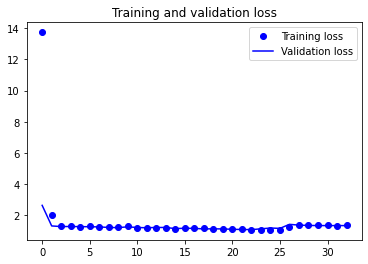

In [28]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()